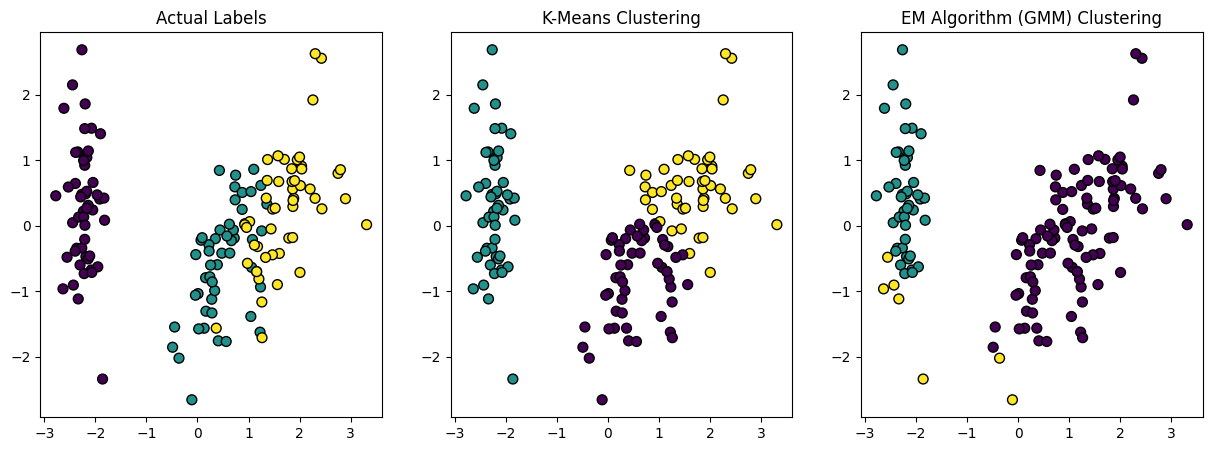

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y_true = iris.target  # True labels (for reference)

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply Expectation-Maximization (Gaussian Mixture Model - GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Reduce dimensionality for visualization (PCA to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize Clustering Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Ground Truth
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', s=50, edgecolors='k')
axes[0].set_title("Actual Labels")

# K-Means Clustering
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolors='k')
axes[1].set_title("K-Means Clustering")

# GMM Clustering
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=50, edgecolors='k')
axes[2].set_title("EM Algorithm (GMM) Clustering")

plt.show()